<div style="text-align: center; border: 1px solid black;">
    <div style="display: inline-flex; justify-content: center; align-items: center; ">
        <img src="https://www.di.ubi.pt/~rcampos/assets/img/ubi.jpg" alt="UBI Logo" style="margin: 10px;"/>
        <img src="https://www.di.ubi.pt/~rcampos/assets/img/DI_FE.jpg" alt="DI Logo" style="margin: 10px;"/>
    </div>
</div>

<b><center><font size="4">Projeto Final - AmazonKaggle</font></center></b>
<center><font size="3">Análise de Reviews da Amazon</font></center>
<div style="text-align: right;">
    <font size="2"><b>Grupo:</b> Gabriel Salazar, Daniel Colavito, Guilherme Cardoso</font><br>
    <font size="2">Universidade da Beira Interior</font>
</div>

# Índice

1. [Basic Information & Contribution](#1.-Basic-Information-&-Contribution)
2. [Declarações de Integridade e IA](#2.-Declarações-de-Integridade-e-IA)
3. [Background & Data Structure](#3.-Background-&-Data-Structure)
4. [Carregamento do Dataset](#4.-Carregamento-do-Dataset)
5. [Processamento e Análise de Dados](#5.-Processamento-e-Análise-de-Dados)
    * [5.1 Estatísticas Gerais](#5.1-Estatísticas-Gerais)
    * [5.2 Análise de Usuários](#5.2-Análise-de-Usuários)
    * [5.3 Análise de Produtos](#5.3-Análise-de-Produtos)
    * [5.4 Análise de Texto](#5.4-Análise-de-Texto)
6. [Visualização](#6.-Visualização)
7. [Logs, Asserts e Exceções](#7.-Logs,-Asserts-e-Exceções)
8. [Screen-Cast](#8.-Screen-Cast)

## 1. Basic Information & Contribution


**Repositório Github:** (https://github.com/Gaboespada123/Proyecto_de_programacion.git)

### Constituição do Grupo:

* **Membro A:** Gabriel Salazar (Gaboespada123)
  * **Contribuição:**  (30 horas)
  * **Tarefas:** Desenvolvimento de `text_analysis`, `visualization`, integração do `main.py`, notebook final.

* **Membro B:** Daniel Colavito (DSColavito)
  * **Contribuição:**  (5 horas)
  * **Tarefas:** Desenvolvimento de `analysis_users` (Top reviewers, helpfullness).

* **Membro C:** Guilherme Cardoso (Guilherme-C808)
  * **Contribuição:** (20 horas)
  * **Tarefas:** Desenvolvimento de `analysis_general` (Análise temporal) e `analysis_products`.


## 2. Declarações de Integridade e IA

### Declaração de Integridade
Eu, Gabriel Salazar, estudante com o número de inscrição 55652 do 1º Ciclo em Inteligência Artificial e Ciência de Dados da Universidade da Beira Interior, declaro ter desenvolvido o presente trabalho e elaborado o presente texto em total consonância com o Código de Integridade da Universidade da Beira Interior.


Eu, Guilherme Cardoso, estudante com o número de inscrição 55817 do 1º Ciclo em Inteligência Artificial e Ciência de Dados da Universidade da Beira Interior, declaro ter desenvolvido o presente trabalho e elaborado o presente texto em total consonância com o Código de Integridade da Universidade da Beira Interior.


### Declaração do uso de IA Generativa
**Ferramentas usadas:** ChatGPT, Gemini.
**Contribuições:**
* **ChatGPT:** Utilizado para esclarecer dúvidas sobre a biblioteca `matplotlib` e para sugestões de otimização no tratamento de exceções (`try-except`).
* **Gemini:** Utilizado para apoio na estruturação do `README.md`, revisão de boas práticas, estrutura, distribução e base do projeto.


## 3. Background & Data Structure

### Background
Este projeto visa analisar o dataset *Amazon Fine Food Reviews* para extrair insights sobre comportamento de consumidores e qualidade de produtos. A solução foi desenvolvida inteiramente em Python nativo (sem pandas), focando na modularidade. As limitações incluem a performance em datasets gigantes devido à ausência de bibliotecas otimizadas como Pandas. Um bom trabalho futuro seria fazer o mesmo projeto mas com as bibliotecas Pandas.

### Data Structure
Optámos por utilizar uma **Lista de Dicionários**.
* **Justificação:** Cada linha do CSV é um dicionário onde a chave é o nome da coluna (ex: 'Score') e o valor é o dado. Isso permite acesso rápido e legível (ex: `review['Score']`). A lista agrupa todas as reviews, permitindo iteração simples.


## 4. Carregamento do Dataset

**Descrição:** O dataset *Amazon Fine Food Reviews* contém avaliações de comida da Amazon. Cada linha representa uma review com campos como `Score`, `Summary`, `Text` e `Time`.

**Carregamento:** Utilizamos o módulo `loader.py` para ler o ficheiro CSV e convertê-lo numa lista de dicionários, permitindo uma manipulação ágil sem dependências externas.

In [1]:

# Importação dos módulos
from src import loader
from src import analysis_general
from src import analysis_users
from src import analysis_products
from src import text_analysis
from src import visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Carregar dados
file_path = 'data/Reviews_small.csv'
data = loader.load_data(file_path)

if data:
    print(f"Sucesso! Dataset carregado com {len(data)} registos.")
    print("Exemplo de estrutura:", list(data[0].keys()))
else:
    print("Erro ao carregar.")

Carregando dados...
Foram carregadas 183 reviews corretamente.
Sucesso! Dataset carregado com 183 registos.
Exemplo de estrutura: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text;;;;']


## 5. Processamento e Análise de Dados

Nesta secção apresentamos os insights extraídos através dos módulos de análise desenvolvidos.


### 5.1 Estatísticas Gerais
Visão global do dataset, incluindo totais e médias.

In [2]:
print("--- 5.1 Estatísticas Gerais ---")
stats = analysis_general.get_general_statistics(data)
print(f"O dataset contém {stats['total_reviews']} reviews de {stats['unique_products']} produtos únicos.")
print(f"A média global de satisfação é de {stats['average_score']:.2f} estrelas.")

--- 5.1 Estatísticas Gerais ---
O dataset contém 183 reviews de 83 produtos únicos.
A média global de satisfação é de 4.34 estrelas.



### 5.2 Análise de Usuários
Identificação dos utilizadores mais ativos na plataforma.

In [3]:
print("\n--- 5.2 Análise de Usuários ---")
top_users = analysis_users.get_top_reviewers(data, top_n=3)
print(f"O utilizador mais ativo é '{top_users[0][0]}' com {top_users[0][1]} reviews.")


--- 5.2 Análise de Usuários ---
O utilizador mais ativo é 'A. Crawford' com 2 reviews.



### 5.3 Análise de Produtos
Identificação dos produtos com melhor classificação média (mínimo de 2 reviews).

In [4]:
print("\n--- 5.3 Análise de Produtos ---")
best_prods = analysis_products.get_best_products(data, min_reviews=2)
print(f"O produto com melhor classificação média é o ID '{best_prods[0][0]}' (Nota: {best_prods[0][1]:.1f}).")



--- 5.3 Análise de Produtos ---
O produto com melhor classificação média é o ID 'B0019CW0HE' (Nota: 5.0).



### 5.4 Análise de Texto
Análise das palavras mais frequentes (excluindo stopwords) para entender os temas recorrentes.

In [5]:

print("\n--- 5.4 Análise de Texto ---")
words = text_analysis.get_most_common_words(data, top_n=5)
print(f"As palavras mais frequentes nas reviews são: {words}")


--- 5.4 Análise de Texto ---
As palavras mais frequentes nas reviews são: [('these', 73), ('them', 51), ('great', 46), ('chips', 43), ('good', 42)]



## 6. Visualização
Gráficos gerados com a biblioteca `matplotlib` para ilustrar a distribuição dos dados.

Análise Visual dos Top Reviewers e Distribuição de Notas:


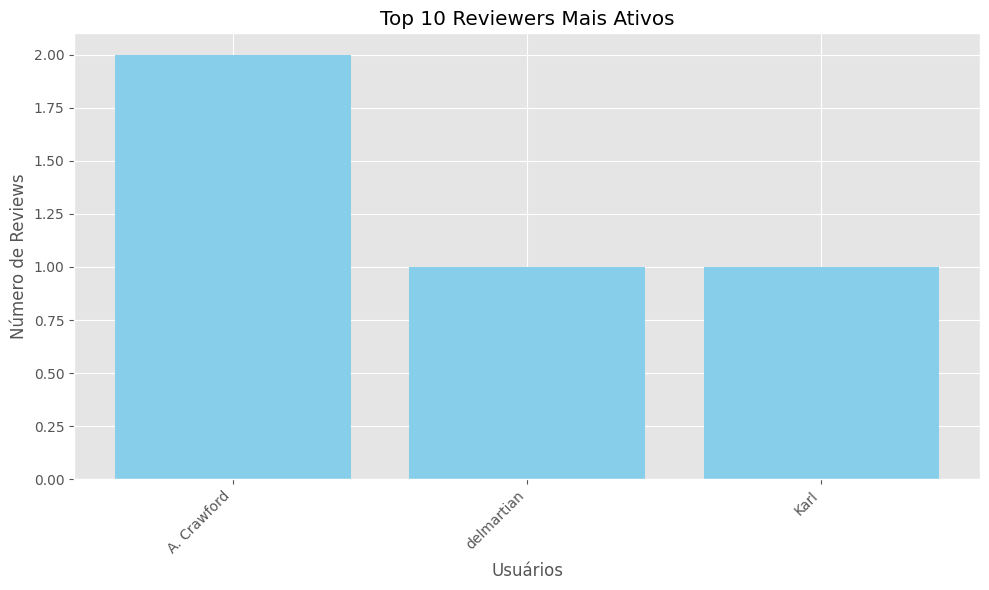

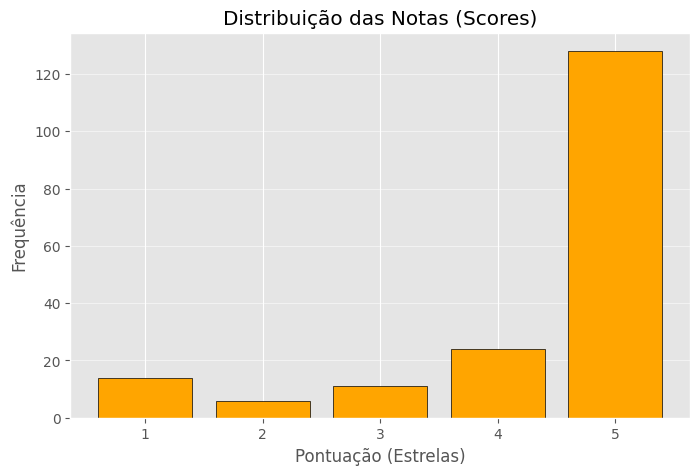

In [6]:
plt.style.use('ggplot')

print("Análise Visual dos Top Reviewers e Distribuição de Notas:")
visualization.plot_top_reviewers(top_users)
visualization.plot_score_distribution(data)


## 7. Logs, Asserts e Exceções
Demonstração do sistema de logs e robustez contra falhas (ex: ficheiros inexistentes).

In [7]:

print("--- 7.1 Simulação de Erro ---")

# 1. Provocamos um erro a propósito tentando carregar um arquivo que não existe
arquivo_falso = "data/nao_existe.csv"
print(f"Tentativa de carregar: {arquivo_falso}...")

# O loader usa try-except, então não vai quebrar, mas vai registrar o erro no log
loader.load_data(arquivo_falso) 

print(">> Sucesso: O sistema detetou o erro, registou-o no log e continuou a funcionar.")

print("\n--- 7.2 Verificação do Conteúdo do Log ---")


try:
    with open("logs/app.log", "r", encoding="utf-8") as f:
        linhas = f.readlines()
        print(f"Últimas 5 entradas registadas no ficheiro 'logs/app.log':\n")
        print("-" * 60)
        
        for linha in linhas[-5:]:
            print(linha.strip())
        print("-" * 60)
except FileNotFoundError:
    print("Ficheiro de log ainda não criado.")

--- 7.1 Simulação de Erro ---
Tentativa de carregar: data/nao_existe.csv...
ERRO: O arquivo não foi encontrado em: data/nao_existe.csv
>> Sucesso: O sistema detetou o erro, registou-o no log e continuou a funcionar.

--- 7.2 Verificação do Conteúdo do Log ---
Últimas 5 entradas registadas no ficheiro 'logs/app.log':

------------------------------------------------------------
[2025-12-08 21:22:54] [INFO] --- Fim da execução ---
[2025-12-08 21:28:09] [INFO] --- Início da execução ---
[2025-12-08 21:28:35] [INFO] --- Fim da execução ---
[2025-12-09 12:55:36] [INFO] --- Início da execução ---
[2025-12-09 12:55:43] [INFO] --- Fim da execução ---
------------------------------------------------------------



Neste projeto, optámos por implementar uma estratégia de robustez e tolerância a falhas.


1.  **Substituição de Asserts por Try-Except:**
    * Em vez de usar `assert`, que interromperia a execução do programa imediatamente em caso de erro, utilizámos blocos `try-except` particularmente nos ficheiros `loader.py` e `analysis_*.py`.


    * **Justificativa:** Em dados reais como este dataset da Amazon, é comum haver registos mal formatados. Não queremos que o programa falhe totalmente só porque 1 review está corrompida. O nosso código ignora o registo problemático (usando `continue`) e processa o resto.

2.  **Registo de Logs:**
    * Todas as exceções capturadas são enviadas para o sistema de logs (implementado em `src/utils.py`), permitindo auditoria posterior sem afetar a experiência do utilizador final.


## 8. Screen-Cast

O vídeo de demonstração do projeto (3 minutos) pode ser visualizado no seguinte link:

* **Link:** (https://youtu.be/TG364WowrHQ)